In [1]:
###############################################################################
# Information
###############################################################################
# Created by Linwood Creekmore 

# https://github.com/linwoodc3


In [2]:
import json
import re

#shameless copy paste from json/decoder.py
FLAGS = re.VERBOSE | re.MULTILINE | re.DOTALL
WHITESPACE = re.compile(r'[ \t\n\r]*', FLAGS)

class ConcatJSONDecoder(json.JSONDecoder):
    def decode(self, s, _w=WHITESPACE.match):
        s_len = len(s)

        objs = []
        end = 0
        while end != s_len:
            obj, end = self.raw_decode(s, idx=_w(s, end).end())
            end = _w(s, end).end()
            objs.append(obj)
        return objs

In [27]:
#**********************************************************************
# How to obviscate API keys; store as json, run, then clear. DON'T add to GITHUB 
#**********************************************************************
'''
TwitterOauth = {u'accesssecret': u'Insert your secret here',
  u'accesstoken': u'Insert your secret here',
  u'consumerkey': u'Insert your secret here',
  u'consumersecret': u'Insert your secret here'}


import json
with open('twitterapikeys.txt', 'w+') as outfile:
    json.dump(TwitterOauth, outfile)
outfile.closed
'''

True

In [3]:
#**********************************************************************
# Keys for API and application keys....DO NOT add this file to git
#**********************************************************************

# I created a nested dictionary with my API keys, then wrote that json to disk.  Now, I load the json and just pass the keys into the application

TwitterOauth = json.load(open('/Users/linwood/projects/LC3-Creations/notebooks/twittertest/twitterapikeys.txt'), cls=ConcatJSONDecoder)

In [ ]:
 TwitterOauth[0]['accesstoken']

In [31]:
#**********************************************************************
# Passing in Oauth values; you obviscate by loading your locally stored json
#**********************************************************************

# Import the necessary package to process data in JSON format
try:
    import json
except ImportError:
    import simplejson as json

# Import the necessary methods from "twitter" library
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream

# Variables that contains the user credentials to access Twitter API 
ACCESS_TOKEN = TwitterOauth[0]['accesstoken']
ACCESS_SECRET = TwitterOauth[0]['accesssecret']
CONSUMER_KEY = TwitterOauth[0]['consumerkey']
CONSUMER_SECRET = TwitterOauth[0]['consumersecret']

oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)


In [ ]:

# Initiate the connection to Twitter Streaming API
twitter_stream = TwitterStream(auth=oauth)

# Get a sample of the public data following through Twitter
iterator = twitter_stream.statuses.filter(locations = '-76.871724,38.902399, -76.859321,38.911399')

# Print each tweet in the stream to the screen 
# Here we set it to stop after getting 1000 tweets. 
# You don't have to set it to stop, but can continue running 
# the Twitter API to collect data for days or even longer. 

with open('data.txt', 'w+') as outfile:
    for tweet in iterator:
        
        # Twitter Python Tool wraps the data returned by Twitter 
        # as a TwitterDictResponse object.
        # We convert it back to the JSON format to print/score
        #print json.dumps(tweet)  

        # The command below will do pretty printing for JSON data, try it out
        # print json.dumps(tweet, indent=4)
        print tweet
   

In [5]:
viks_vs_hawks = json.load(open('/Users/linwood/projects/LC3-Creations/notebooks/twittertest/viks_vs_hawks.txt'), cls=ConcatJSONDecoder)

In [6]:
viks_vs_hawks = [json.loads(l) for l in viks_vs_hawks]

In [22]:
goal = ["PHS |⚡️804⚡️ | RVA ","Virginia, USA", "Washington, DC"]

In [9]:
# Use regex to return only text seperated by , (city, state) or text  by itself; ignores symbols

for l in viks_vs_hawks[800:820]:
    try:
        print re.search('^ ?[^ ]?[A-Za-z]+ ?(,)?[ ]?[A-Za-z]+',l['user']['location']).group(0).strip()
    except:
        pass

Minneapolis
dana
Alberta, Canada
Alberta, Canada
Monterey, California
PA
Alberta, Canada
Eden Prairie
Minneapolis
Minneapolis
Not with
Eden Prairie
Canada
Minnesota
New York
Seattle
cameron, wi


In [15]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
geolocator.geocode('Richmond, Virginia')

cities=[]
for l in viks_vs_hawks[800:820]:
    try:
        cities.append(re.search('^ ?[^ ]?[A-Za-z]+ ?(,)?[ ]?[A-Za-z]+',l['user']['location']).group(0).strip())
    except:
        pass

In [17]:
from geopy.geocoders import 
for l in set(cities):
    print l

Canada
Seattle
cameron, wi
Monterey, California
Minnesota
Minneapolis
Not with
PA
Alberta, Canada
New York
Eden Prairie
dana


In [52]:
skins_vs_pack_locs = [l['user']['location'] for l in b]   

In [53]:
len(skins_vs_pack_locs)

8452

In [ ]:
for l in set(skins_vs_pack_locs):
    try:
        print geolocator.geocode(l)
    except:
        pass

In [ ]:
skins_vs_pack_locs[1:100]

In [41]:
(geolocator.geocode('Twin Cities'))

Location((38.2910251, -121.31106, 0.0))

In [17]:
skins_vs_pack_truelocs = []
for l['user']['location'] in b:
    try:
        if len(geolocator.geocode(l['user']['location'])) > 0:
            skins_vs_pack_truelocs.append(l['user']['location'])
    except:
        pass   

In [18]:
len(skins_vs_pack_truelocs)

0

In [ ]:
for l in b[1:10]:
    print l['user']['location']

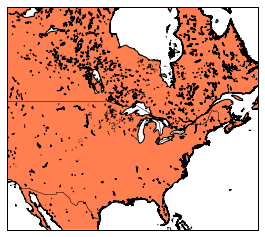

In [19]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

23.539129, -120.429975
62.138919, -57.846612
 
map = Basemap(projection='merc', lat_0 = 23, lon_0 = -120,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-120.429975, llcrnrlat=23.539129,
    urcrnrlon=-57.846612, urcrnrlat=62.138919) 
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()



plt.show()